In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [2]:
df = pd.read_csv("card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [27]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# results are imbalance
labels=["Genuine","Fraud"]

fraud_or_not = df["fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

In [5]:
target_0 = df['fraud'].value_counts()[0]
target_1 = df['fraud'].value_counts()[1]
target_1/(target_0+target_1), target_0/(target_0+target_1)

(0.087403, 0.912597)

In [ ]:
df[df['fraud']==1].nunique(axis=1)

In [19]:
df.groupby('fraud').value_counts(['repeat_retailer'], normalize=True)

fraud  repeat_retailer
0.0    1.0                0.881672
       0.0                0.118328
1.0    1.0                0.880119
       0.0                0.119881
Name: proportion, dtype: float64

In [33]:
df.groupby('repeat_retailer').value_counts(['fraud'], normalize=True)

repeat_retailer  fraud
0.0              0.0      0.911551
                 1.0      0.088449
1.0              0.0      0.912738
                 1.0      0.087262
Name: proportion, dtype: float64

In [20]:
df.groupby('fraud').value_counts(['used_chip'], normalize=True)

fraud  used_chip
0.0    0.0          0.640598
       1.0          0.359402
1.0    0.0          0.743601
       1.0          0.256399
Name: proportion, dtype: float64

In [49]:
df.groupby('used_chip').value_counts(['fraud'], normalize=True)

used_chip  fraud
0.0        0.0      0.899949
           1.0      0.100051
1.0        0.0      0.936044
           1.0      0.063956
Name: proportion, dtype: float64

In [21]:
df.groupby('fraud').value_counts(['used_pin_number'], normalize=True)

fraud  used_pin_number
0.0    0.0                0.890056
       1.0                0.109944
1.0    0.0                0.996877
       1.0                0.003123
Name: proportion, dtype: float64

In [48]:
df.groupby('used_pin_number').value_counts(['fraud'], normalize=True)

used_pin_number  fraud
0.0              0.0      0.903123
                 1.0      0.096877
1.0              0.0      0.997286
                 1.0      0.002714
Name: proportion, dtype: float64

In [22]:
df.groupby('fraud').value_counts(['online_order'], normalize=True)

fraud  online_order
0.0    1.0             0.622225
       0.0             0.377775
1.0    1.0             0.946318
       0.0             0.053682
Name: proportion, dtype: float64

In [47]:
df.groupby('online_order').value_counts(['fraud'], normalize=True)

online_order  fraud
0.0           0.0      0.986573
              1.0      0.013427
1.0           0.0      0.872860
              1.0      0.127140
Name: proportion, dtype: float64

In [7]:
df.isnull().sum().sum() # missing values

0

In [9]:
df.duplicated().sum() # duplicated values

0

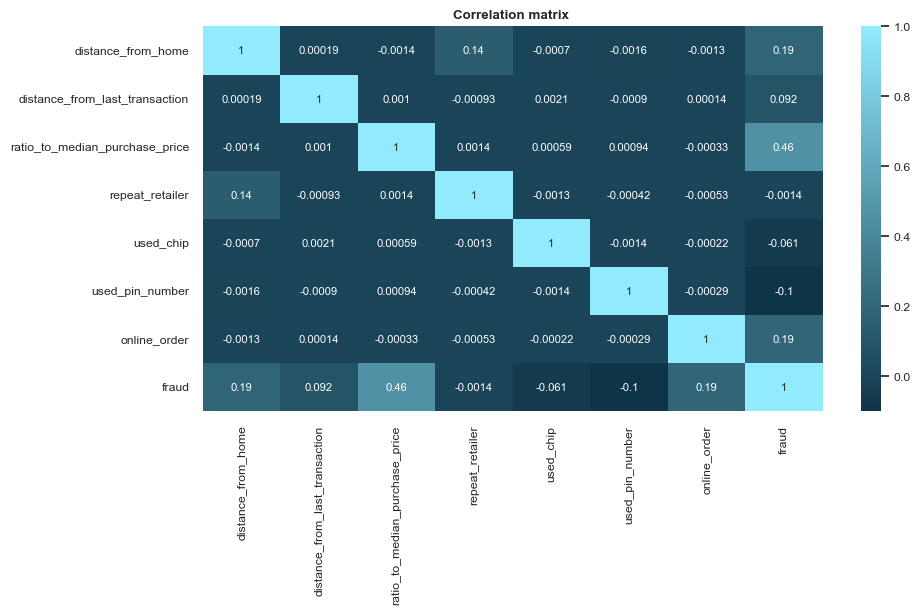

In [52]:
colors = ["#0E3547", "#92EAFF", "#6B6B6B"]
cmap = LinearSegmentedColormap.from_list('Custom', colors[:2], N=256)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid", context="notebook", font_scale=0.8)
sns.heatmap(df.corr(), cmap=cmap, annot=True, annot_kws={"size": 8})
plt.title("Correlation matrix ", fontweight='bold')
plt.show()